In [20]:
library(dplyr)
library(ggplot2)
library(Rtsne)

In [1]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
filename = paste0(mydir,"pool1_17_D52.scanpy.dimreduction.harmonyPCA.tsv")

In [3]:
df = read.csv(filename, sep = "\t", row.names=1)
df[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
AAACCTGAGAAAGTGG-1-0,-5.104239,9.886840,4.60978941,-6.5451223,8.2315778
AAACCTGAGATCTGCT-1-0,-7.725349,4.146478,-0.01496614,-5.3041565,-0.3797163
AAACCTGAGCTAGTGG-1-0,22.527179,1.776619,-2.18050576,0.1603308,-1.8163934
AAACCTGAGGAGCGTT-1-0,-1.706279,-12.850743,2.63706688,0.6206723,-0.2064441
AAACCTGAGGTGCTTT-1-0,-8.901477,7.098307,5.98557883,-8.7939237,-1.0949268


In [4]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn.csv"
df_clusters = read.csv(filename, row.names = 1)
head(df_clusters)

cell,cluster,donor_id,ncells,pseudo_cell
CCAGCGAGTTACTGAC-1-64,cluster1,HPSI0513i-veve_2,72,HPSI0513i-veve_2-cluster1
AGCTCCTTCTTACCGC-1-64,cluster1,HPSI0513i-veve_2,72,HPSI0513i-veve_2-cluster1
GATCTAGCATCCAACA-1-65,cluster1,HPSI0513i-veve_2,72,HPSI0513i-veve_2-cluster1
GCTGCGACAAGGACAC-1-64,cluster1,HPSI0513i-veve_2,72,HPSI0513i-veve_2-cluster1
ACATGGTGTTATCACG-1-64,cluster1,HPSI0513i-veve_2,72,HPSI0513i-veve_2-cluster1
TTGCCGTAGGAGTTTA-1-65,cluster1,HPSI0513i-veve_2,72,HPSI0513i-veve_2-cluster1


In [5]:
df_pca = df
df_pca$cell = rownames(df_pca)

In [8]:
nrow(df_pca)
nrow(df_clusters)

[1] 523094

[1] 54217

In [9]:
df0 = inner_join(df_pca, df_clusters)
nrow(df0)

Joining, by = "cell"
Warning message:
“Column `cell` joining character vector and factor, coercing into character vector”

[1] 54217

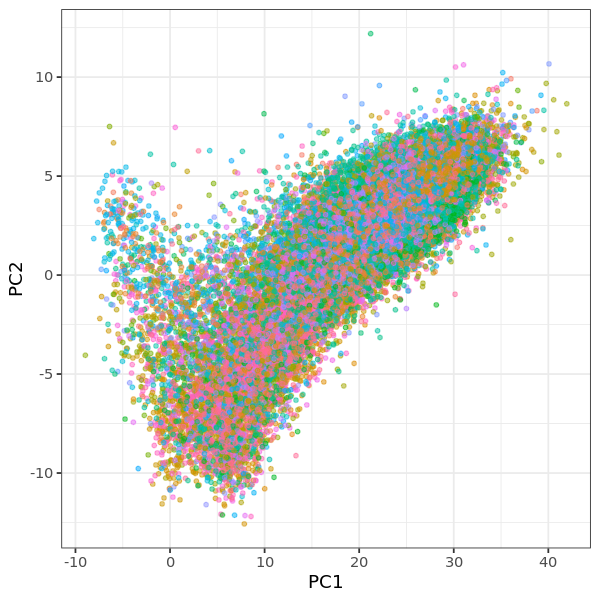

In [19]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df0,aes(x=PC1, y=PC2, colour = donor_id)) + geom_point(alpha=0.5, size=1) + 
    theme_bw() + theme(legend.position = "none")